In [20]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


In [21]:
print(torch.__version__)

2.4.1


In [3]:
if torch.cuda.is_available():
    device='cuda'
elif torch.backends.mps.is_available():
    device=torch.device("mps")
else:
    device='cpu'
print(f"Using device = {device}")

Using device = mps


In [4]:
m=0.7
c=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=m*X+c
print(X.shape,y.shape)
print(X.type,y.type)

torch.Size([50, 1]) torch.Size([50, 1])
<built-in method type of Tensor object at 0x12df4f4a0> <built-in method type of Tensor object at 0x12df7ad10>


In [5]:
split=int(0.8*len(X))
X_train,y_train=X[:split],y[:split]
X_test,y_test=X[split:],y[split:]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [6]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,prediction=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train,y_train,c='b',s=8,label="Traininng Data")
    plt.scatter(X_test,y_test,c='r',s=8,label="test data Data")
    if prediction is not None:
         plt.scatter(X_test,prediction,c='g',s=8,label="predicted data Data")
    plt.legend()


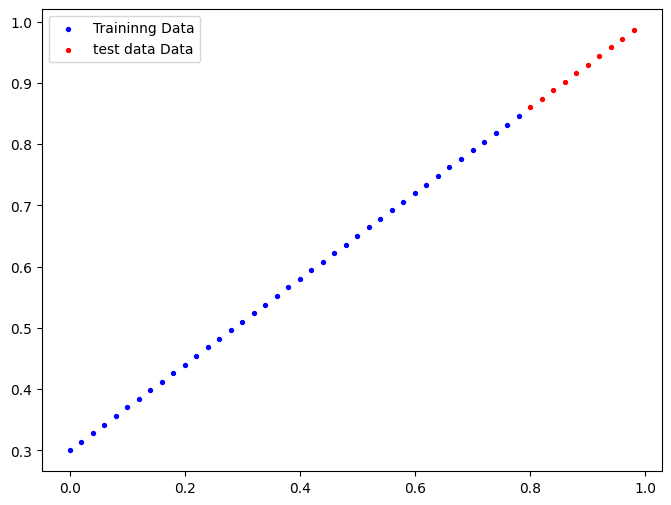

In [7]:
plot_data()

In [8]:
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x + self.bias

In [9]:
torch.manual_seed(42)
model_0=FirstNeuralNetwork()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

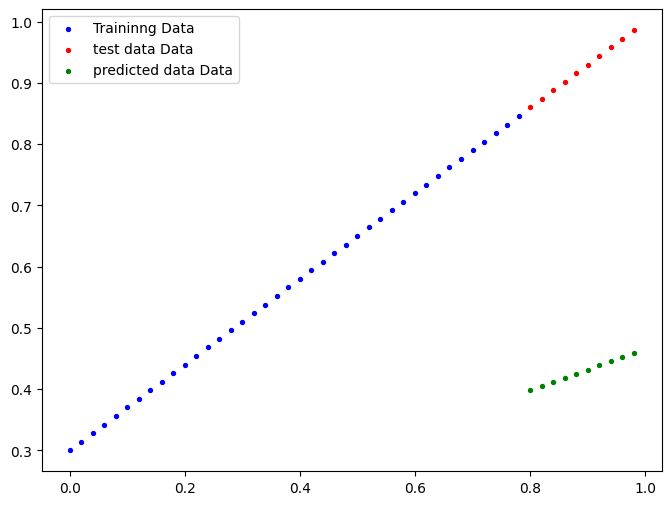

In [10]:
with torch.inference_mode():
    y_pred=model_0(X_test)
plot_data(prediction=y_pred)

In [11]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [12]:
model_0.to(device)

FirstNeuralNetwork()

In [17]:
# set up training loop
epochs=500
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
trainLossList=[]
testLossList=[]
for epoch in range(epochs):
    model_0.train()
    # forward pass
    train_pred=model_0(X_train)
    # compute training loss
    train_loss=loss_fn(y_train,train_pred)
    # zero grad optimizer
    optimizer.zero_grad()
    
    # backpropagate losss
    train_loss.backward()  
     # step optimizer
     
    optimizer.step()
    
    #Testing
    with torch.inference_mode():
        test_preds=model_0(X_test)
        test_loss=loss_fn(y_test,test_preds)
    if epoch%10==0:
        print(f"Epochs:{ epoch} Trains_loss { train_loss:.5f} test_loss {test_loss:.5f}")
    trainLossList.append(train_loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())
    

Epochs:0 Trains_loss 0.00000 test_loss 0.00000
Epochs:10 Trains_loss 0.00000 test_loss 0.00000
Epochs:20 Trains_loss 0.00000 test_loss 0.00000
Epochs:30 Trains_loss 0.00000 test_loss 0.00000
Epochs:40 Trains_loss 0.00000 test_loss 0.00000
Epochs:50 Trains_loss 0.00000 test_loss 0.00000
Epochs:60 Trains_loss 0.00000 test_loss 0.00000
Epochs:70 Trains_loss 0.00000 test_loss 0.00000
Epochs:80 Trains_loss 0.00000 test_loss 0.00000
Epochs:90 Trains_loss 0.00000 test_loss 0.00000
Epochs:100 Trains_loss 0.00000 test_loss 0.00000
Epochs:110 Trains_loss 0.00000 test_loss 0.00000
Epochs:120 Trains_loss 0.00000 test_loss 0.00000
Epochs:130 Trains_loss 0.00000 test_loss 0.00000
Epochs:140 Trains_loss 0.00000 test_loss 0.00000
Epochs:150 Trains_loss 0.00000 test_loss 0.00000
Epochs:160 Trains_loss 0.00000 test_loss 0.00000
Epochs:170 Trains_loss 0.00000 test_loss 0.00000
Epochs:180 Trains_loss 0.00000 test_loss 0.00000
Epochs:190 Trains_loss 0.00000 test_loss 0.00000
Epochs:200 Trains_loss 0.00000 

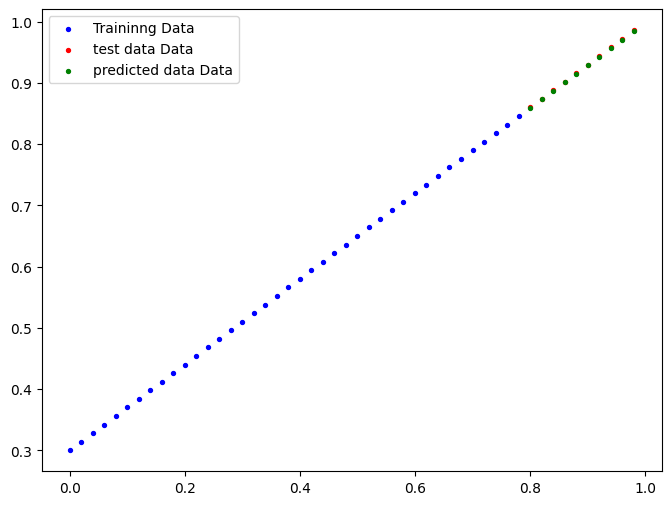

In [15]:
with torch.inference_mode():
    y_pred=model_0(X_test)
plot_data(prediction=y_pred.cpu())

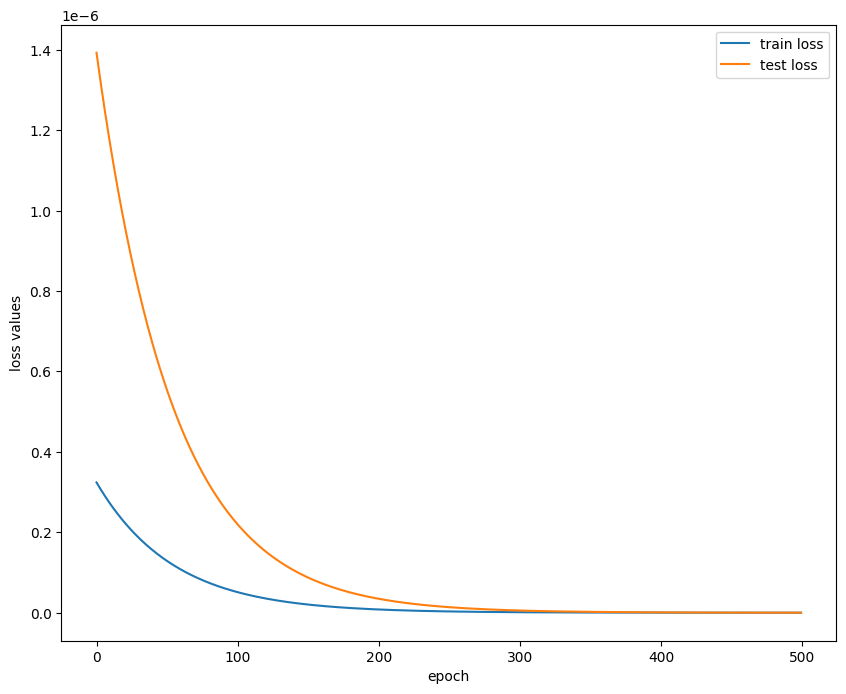

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(epochs),trainLossList,label="train loss")
plt.plot(range(epochs),testLossList,label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss values")
plt.legend()
